### Import Packages

In [92]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

In [49]:
#Set display options
%matplotlib inline
rcParams['figure.figsize'] = 10, 6

## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [50]:
#Read logins.json into pandas dataframe
logins_df = pd.read_json("logins.json")
logins_df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [51]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [52]:
#Change RangeIndex to DatetimeIndex & sort the index in ascending order
logins_df.set_index(pd.to_datetime(logins_df['login_time'],utc=True), drop=True, inplace=True)
logins_df.sort_index(inplace=True)

In [53]:
#Set the intial value of count to 1 for all rows
logins_df['count'] = 1
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16+00:00 to 1970-04-13 18:57:38+00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   count       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


In [54]:
#Resample to 15 min intervals and sum the 'count'
logins_15min_df = logins_df.groupby(pd.Grouper(key='login_time', freq='15min')).sum()
logins_15min_df

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


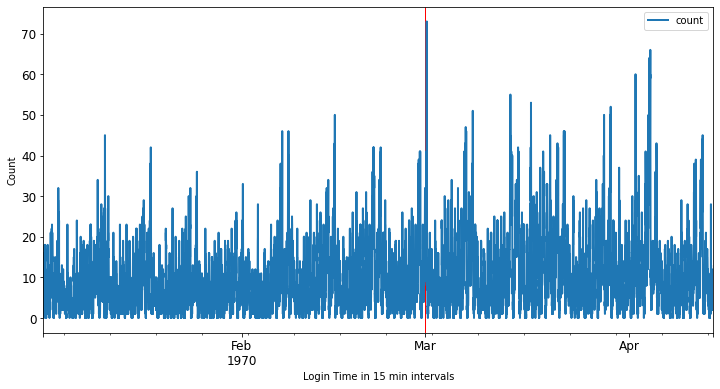

In [82]:
#plot the login counts for every 15 min
logins_15min_df.plot(figsize=(12, 6), fontsize=12, linewidth=2)
plt.xlabel('Login Time in 15 min intervals')
plt.ylabel('Count')
plt.axvspan('1970-03-01', '1970-03-01', color='red')
plt.show()

- From the plot we see a slight increase in the activity from March to April
- Maximum activity noted on March 1st

In [85]:
#Daily activity - Resample to Daily intervals and sum the 'count'
logins_daily_df = logins_df.groupby(pd.Grouper(key='login_time', freq='D')).sum()
logins_daily_df

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
...,...
1970-04-09,818
1970-04-10,1009
1970-04-11,1352


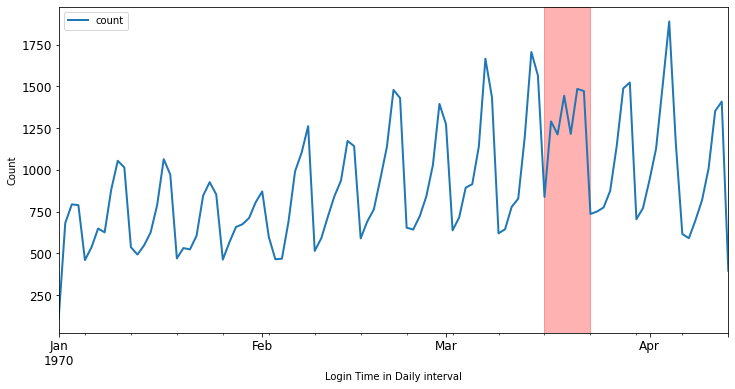

In [68]:
#plot the login counts for every day
logins_daily_df.plot(figsize=(12, 6), fontsize=12, linewidth=2)
plt.xlabel('Login Time in Daily interval')
plt.ylabel('Count')
plt.axvspan('1970-03-16', '1970-03-23', color='red', alpha=0.3)
plt.show()

- From the daily plot, we see that the activities starts to increase after Februaury and continues to increase until April.  
- There are about 4 - 5 peaks in between each month which might due to high weekend activities. 
- One particular event in March as seen in the shaded area shows multiple peaks, which needs to be further investigated.

In [69]:
#Hourly activity - Resample to Hourly intervals and sum the 'count'
logins_hourly_df = logins_df.groupby(pd.Grouper(key='login_time', freq='H')).sum()
logins_hourly_df

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53
...,...
1970-04-13 14:00:00,32
1970-04-13 15:00:00,19
1970-04-13 16:00:00,22


In [87]:
#Add a new column that holds the day of the week information
logins_hourly_df['dayOfWeek'] = logins_hourly_df.index.day_name()

#Use pivot_table() reshape the dataframe with sum of count of logins for Day of the week as columns and hours in a day as index
hourly_pivot = logins_hourly_df.pivot_table(index=logins_hourly_df.index.hour,
                                                            columns='dayOfWeek', values='count', aggfunc='sum')

hourly_pivot

dayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
login_time,,,,,,,
0,975,531,1254,1123,816,607,687
1,957,414,1562,1355,777,566,686
2,771,312,1608,1608,625,394,482
3,502,236,1574,1647,375,198,299
4,353,206,1719,2107,255,149,245
5,245,121,1093,1102,136,113,135
6,121,66,408,382,67,46,48
7,105,111,178,192,81,64,84
8,109,147,127,153,95,88,99


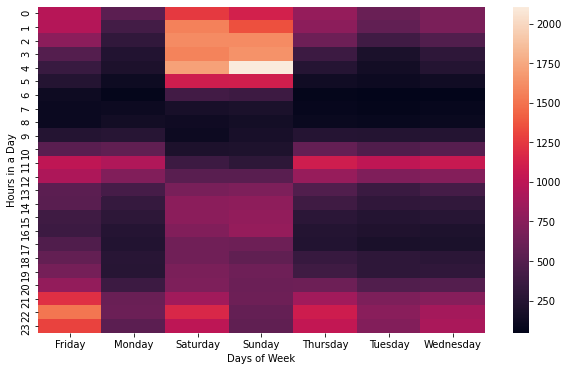

In [88]:
#Plt the heatmap to see the distribution of logins across a week
sns.heatmap(hourly_pivot)
plt.ylabel("Hours in a Day")
plt.xlabel("Days of Week")
plt.show()

- Clearly, weekend nights are busier than weekdays. Peak hours are from Fri 2100 to Sat 0530 & Sun 0000 to 0530.  
- During weekdays, 0930 to 1230 is somewhat busier than rest of the day.

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?  
**Answer:** "Average number of trips a driver makes between the two cities" can be used as a key measure  
   
   
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:  
a. how you will implement the experiment  
**Answer:**   
Step 1: Pick enough random sample of drivers, > 30
Step 2: Record the daily average number of times these 30 drivers pass through the toll for a month (day and night) BEFORE reimbursing all toll costs  
Step 2: Record the daily average number of times these 30 drivers pass through the toll for a month (day and night) AFTER implementing the experiment of reimbursing all toll costs to the drivers. To get enough data this should be collected after about a month or 2 of marketing.   

b. what statistical test(s) you will conduct to verify the significance of the observation  
**Answer:**  
Perform a one-tailed t-test to see if there is an increase in the daily average number

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.  
**Answer:**  
I will first state the null hypothesis and its alternate as below,  
- Null hypothesis: There is no difference in the average number of trips made.  
- Alternate hypothesis: There is an increase in the average number of trips made after implementing the toll reimbursement.  
If the p-value from the one-tailed t-test is less than 0.05, we REJECT the Null hypothesis and conclude that there is enough evidence that there is an increase in the average number of times these drivers made trips between the two cities.      
If p-value >= 0.05, we FAIL TO REJECT the Null hypothesis and conclude that there is not enough evidence to show an increase the mean value. The experiment failed.    
- Caveat: One caveat here is drivers might take advantage of the free toll so they choose to go to the other city during its peak hours only. 

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).
Data description  
● city: city this user signed up in  
● phone: primary device for this user  
● signup_date: date of account registration; in the form ‘YYYYMMDD’  
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’  
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup  
● avg_rating_by_driver: the rider’s average rating over all of their trips  
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips  
● surge_pct: the percent of trips taken with surge multiplier > 1  
● avg_surge: The average surge multiplier over all of this user’s trips  
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up  
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise  
● weekday_pct: the percent of the user’s trips occurring during a weekday  

### Data Wrangling

In [233]:
#Read data from ultimate_data_challenge.json to a pandas dataframe
udc_df = pd.read_json("ultimate_data_challenge.json")

In [234]:
udc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


We will create the boolean "active" column, 1 being active user ie., took a trip in the last 30 days, 0 being inactive ie., no trips in the last 30 days. But we don't know when this data was pulled to decide the last 30 days.
Convert last_trip_date column to pandas datetime and we will assume the recent day in this column as the date when data was pulled.

In [235]:
udc_clean_df =  udc_df.copy()
udc_clean_df.last_trip_date = pd.to_datetime(udc_clean_df.last_trip_date)
udc_clean_df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [236]:
from datetime import datetime
data_date = datetime(2014, 7, 1)
udc_clean_df['active<30'] = data_date - udc_clean_df.last_trip_date 

In [237]:
udc_clean_df['active<30'] = udc_clean_df['active<30'].dt.days < 30
udc_clean_df['active<30'] = udc_clean_df['active<30'].astype(int)

In [238]:
#we can now drop two datetime features signup_date, last_trip_date and phone
udc_clean_df.drop(columns=['signup_date','last_trip_date','phone'],inplace=True)

In [239]:
udc_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  bool   
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    49799 non-null  float64
 9   active<30               50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 3.5+ MB


In [240]:
#Convert all features to numeric
udc_clean_df['ultimate_black_user'] = udc_clean_df['ultimate_black_user'].astype(int)

In [241]:
#Use LabelEncoder to convert city feature to numeric values and drop city
#Astapor - 0,King's Landing - 1, Winterfell - 2 

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
udc_clean_df['city_code'] = LE.fit_transform(udc_clean_df['city'])
udc_clean_df.drop(columns=['city'], inplace=True)

There are some missing values in "avg_rating_of_driver" & "avg_rating_by_driver".
Let us analyse them using correlation matrix.

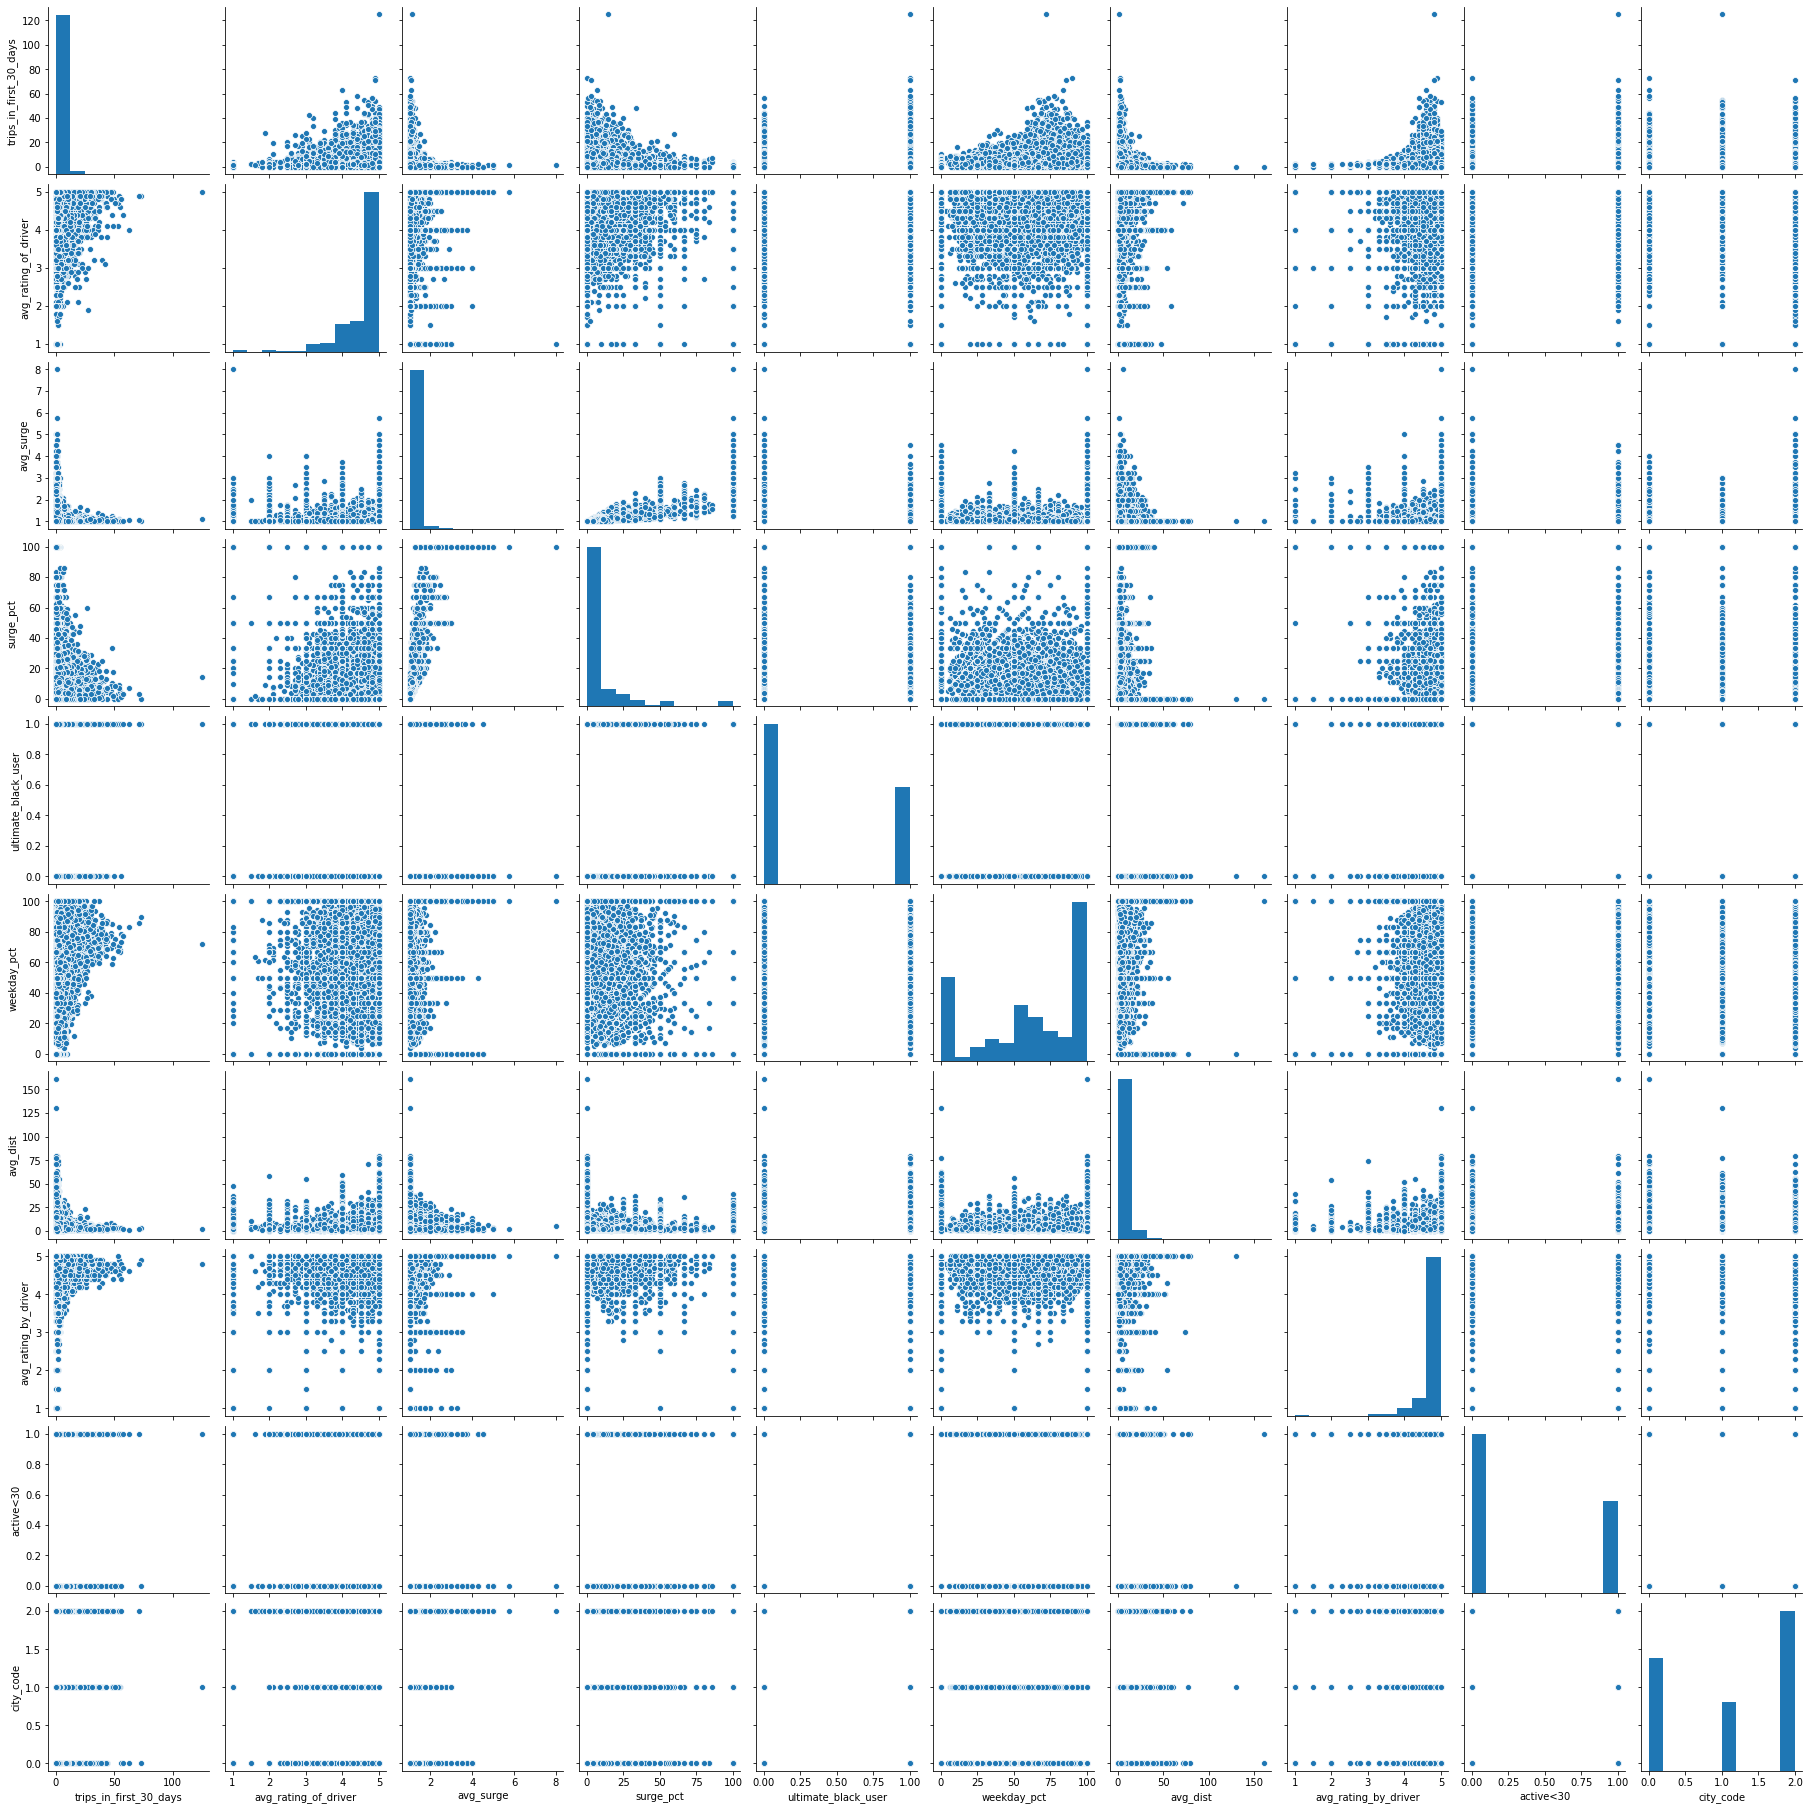

In [242]:
import seaborn as sns
sns.pairplot(udc_clean_df)

In [243]:
corr = udc_clean_df.corr()
corr

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active<30,city_code
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115,0.214728,0.053888
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175,-0.010834,-0.076052
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597,-0.003567,-0.035441
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103,0.010612,-0.061317
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343,0.210259,-0.040722
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442,0.026413,-0.003040
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540,-0.090279,0.041204
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000,-0.025635,-0.073287
active<30,0.214728,-0.010834,-0.003567,0.010612,0.210259,0.026413,-0.090279,-0.025635,1.000000,0.069058
city_code,0.053888,-0.076052,-0.035441,-0.061317,-0.040722,-0.003040,0.041204,-0.073287,0.069058,1.000000


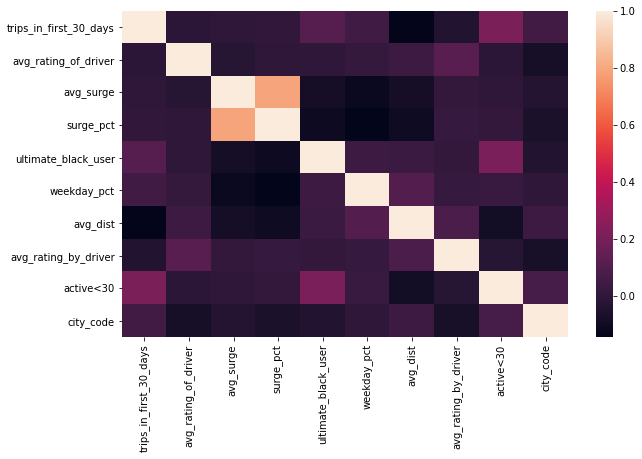

In [244]:
sns.heatmap(corr)

- We have 2 correlated features: avg_surge & surge_pct, so we will drop the avg_surge feature
- There is not much contribution by the ratings features. We will drop them as well
- There are two positively correlated features, trips_in_first_30_days & ultimate_black_user
- One negatively correlated feature, avg_dist

In [245]:
#Drop avg_surge, avg_rating_by_driver, avg_rating_of_driver feature
udc_clean_df.drop(columns=['avg_surge','avg_rating_by_driver','avg_rating_of_driver'], inplace=True)

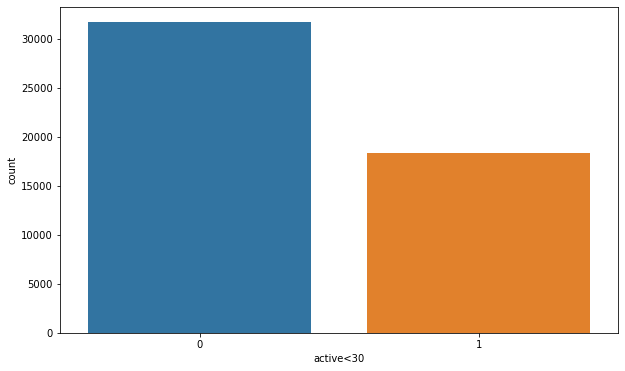

In [285]:
sns.countplot(x= 'active<30', data = udc_clean_df)

In [291]:
pct = (sum(udc_clean_df['active<30'] == 1)/udc_clean_df.shape[0])*100

In [292]:
print("percent of drivers retained: ", pct)

percent of drivers retained:  36.620000000000005


### Binary Classification model
#### 1. Logistic Regression

In [263]:
#Classification metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
modelScore_list = []
def model_score(name, y_pred, y_pred_prob, fit_time, pred_time, modelScore_list):
    accuracy = accuracy_score(y_pred, y_test) * 100
    roc_auc = roc_auc_score(y_test, y_pred_prob) * 100
    f1_1 = f1_score(y_test, y_pred, pos_label = 1)
    f1_0 = f1_score(y_test, y_pred, pos_label = 0)
    prec_1 = precision_score(y_test, y_pred, pos_label=1)
    prec_0 = precision_score(y_test, y_pred, pos_label=0)
    rec_1 = recall_score(y_test, y_pred, pos_label=1)
    rec_0 = recall_score(y_test, y_pred, pos_label=0)
    modelScore_list = modelScore_list.append([name, accuracy, roc_auc, f1_1, prec_1, rec_1,
                                              f1_0, prec_0, rec_0, fit_time, pred_time])
    return modelScore_list


In [255]:
#Set the independent variables X and dependent variable y
y = udc_clean_df['active<30']
X = udc_clean_df.drop(columns=['active<30'])

In [256]:
#Split train and test date
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
#Perform GridSearchCV for hyperparameter tuning
param_grid = {'C': np.arange(0.05, 4, 0.1)}
lr = LogisticRegression()
gridSearch_lr = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
gridSearch_lr.fit(X_train, y_train)
print(gridSearch_lr.best_params_)
print(gridSearch_lr.best_score_)

{'C': 0.05}
0.6785014037990423


In [264]:
import time
lr = gridSearch_lr.best_estimator_

#Fit the training set
fit_start = time.time()
lr.fit(X_train, y_train)
fit_end = time.time()

#Predict the test set
predict_start = time.time()
y_pred = lr.predict(X_test)
predict_end = time.time()
y_pred_prob = lr.predict_proba(X_test)[:,1]

#Model score
model_score('Log Reg',y_pred, y_pred_prob, (fit_end - fit_start), (predict_end - predict_start), modelScore_list )
model_score_pd = pd.DataFrame(modelScore_list, columns = ['Model', 'Accuracy(%)', 'ROC_AUC(%)', 'F1_1', 'Prec_1','Rec_1', 
                                                          'F1_0', 'Prec_0', 'Rec_0', 'Fit_Time(s)', 'Predict_Time(s)'])
model_score_pd

,Model,Accuracy(%),ROC_AUC(%),F1_1,Prec_1,Rec_1,F1_0,Prec_0,Rec_0,Fit_Time(s),Predict_Time(s)
0,Log Reg,67.1,67.391336,0.39633,0.609481,0.293638,0.773883,0.684249,0.890541,0.14913,0.001627


#### 2. LightGBM

In [267]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
#Hyperparameter Tuning using RandomizedSearchCV
lgb = LGBMClassifier(objective='binary', boosting_type='gbdt',metric='auc', random_state=5)

params_lgb = {'learning_rate': [0.1, 0.01, 0.001],
               'num_leaves' : [30, 50],
               'min_data_in_leaf' : [20, 25, 30,50],
               'max_depth' : [10, 20, 30, 50],
               'min_gain_to_split' : [0.5, 0.8, 1.0],
               'lambda_l1' : [0, 1 ,10, 25, 50],
               'lambda_l2' : [0, 1 ,10, 25, 50],
               'max_bin' : [50, 100, 200, 250],
               'n_estimators': [250,  500, 1000, 1500],
               'colsample_bytree' : [0.2,0.4,0.6,0.8,1],
               'subsample' : [0.2,0.4,0.6,0.8,1]
               }


# Instantiate RandomSearchCV
randomSearch_lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params_lgb,
                                      n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit to training set
randomSearch_lgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.5s finished


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='auc', objective='binary',
                                            random_state=5),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.2, 0.4, 0.6, 0.8,
                                                             1],
                                        'lambda_l1': [0, 1, 10, 25, 50],
                                        'lambda_l2': [0, 1, 10, 25, 50],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_bin': [50, 100, 200, 250],
                                        'max_depth': [10, 20, 30, 50],
                                        'min_data_in_leaf': [20, 25, 30, 50],
                                        'min_gain_to_split': [0.5, 0.8, 1.0],
                                        'n_estimators': [250, 500, 1000, 1500],
                                        'num_leaves': [30,

In [268]:
print(randomSearch_lgb.best_params_)
print(randomSearch_lgb.best_score_)

{'subsample': 0.2, 'num_leaves': 30, 'n_estimators': 500, 'min_gain_to_split': 0.5, 'min_data_in_leaf': 20, 'max_depth': 20, 'max_bin': 250, 'learning_rate': 0.1, 'lambda_l2': 10, 'lambda_l1': 0, 'colsample_bytree': 1}
0.7796249784750694


In [269]:
lgb = randomSearch_lgb.best_estimator_
fit_start = time.time()
lgb.fit(X_train, y_train)
fit_end = time.time()

predict_start = time.time()
y_pred = lgb.predict(X_test)
predict_end = time.time()

y_pred_prob = lgb.predict_proba(X_test)[:,1]

#Model score
model_score( 'LightGBM' ,y_pred, y_pred_prob, (fit_end - fit_start), (predict_end - predict_start), modelScore_list)
model_score_pd = pd.DataFrame(modelScore_list, columns = ['Model', 'Accuracy(%)', 'ROC_AUC(%)', 'F1_1', 'Prec_1','Rec_1', 
                                                          'F1_0', 'Prec_0', 'Rec_0', 'Fit_Time(s)', 'Predict_Time(s)'])
model_score_pd

,Model,Accuracy(%),ROC_AUC(%),F1_1,Prec_1,Rec_1,F1_0,Prec_0,Rec_0,Fit_Time(s),Predict_Time(s)
0,Log Reg,67.10,67.391336,0.396330,0.609481,0.293638,0.773883,0.684249,0.890541,0.149130,0.001627
1,LightGBM,78.02,84.167104,0.687429,0.720632,0.657151,0.830506,0.810262,0.851787,0.418945,0.014744


In [278]:
lgb.feature_importances_

array([655, 460,  94, 819, 794, 293], dtype=int32)

In [283]:
udc_clean_df['weekday_pct'].describe()

count    50000.000000
mean        60.926084
std         37.081503
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

In [295]:
udc_clean_df[udc_clean_df['active<30']==1].weekday_pct.mean()

62.21460404150738

- Our LightGBM model has performed really well with accuracy 78%, ROC_AUC 84%. 
- As avg_dist was negatively correlated and trips_in_first_30_days is positively correlated, assigning new drivers short distance rides in their first month will help in retaining them for longer.
- From our model's feature importance attribute, weekday_pct was given high importance. Drivers with low weekday_pct can be given some surge in order to encourage them to drive more on weekdays.